In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


data = pd.read_csv('051622 Sample 1.txt', delimiter='\t', header=None)
pv = data[1].to_numpy()
T_s = data[0][1] - data[0][0]
timestamp = np.arange(start = 0, stop = len(pv)*T_s, step = T_s)

In [6]:
timestamp

array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 6.45997e+01,
       6.45998e+01, 6.45999e+01])

(0.0, 0.016)

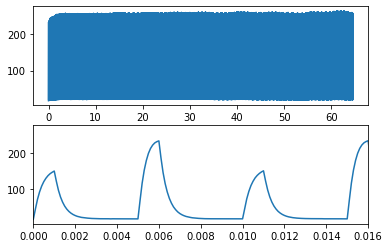

In [7]:
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.plot(timestamp,pv)
ax2.plot(timestamp,pv)
ax2.set_xlim(0, 160*T_s)

(160.0, 170.0)

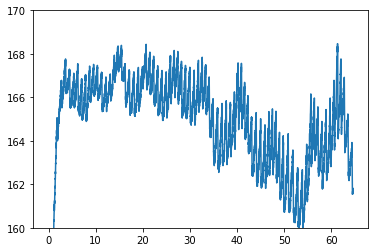

In [14]:

import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
f_s = 1/T_s

red = pv[int(0.001*f_s):-1:int(1/T_s *0.01)]
timestamp_ds = np.arange(0, timestamp[-1],0.01)

plt.plot(timestamp_ds, red)
plt.ylim(160, 170)





/var/folders/l7/h3nhqt8n2rl5hxy9gsqrk58r0000gn/T/ipykernel_2721/413014430.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(10.0, 20.0)

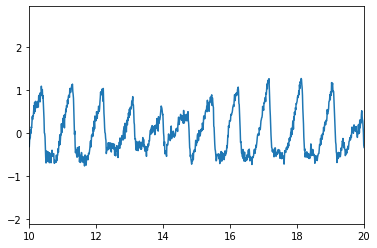

In [9]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import datetime
import pandas as pd
from scipy import signal

# detrend the low_peak series
timestamp_ds
red

#decompose series
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_series = seasonal_decompose(red, model='additive',period=100)
#decompose_series.plot()
#remove trend and seasonal components
series_adjusted = red - decompose_series.seasonal- decompose_series.trend
series_adjusted
plt.plot(timestamp_ds,series_adjusted)
plt.xlim(10,20)


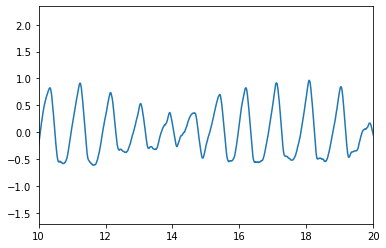

In [10]:
denoise = np.convolve(series_adjusted, np.ones(20)/20, mode = 'same')
plt.plot(timestamp_ds, denoise)
plt.xlim(10, 20)
plt.show()



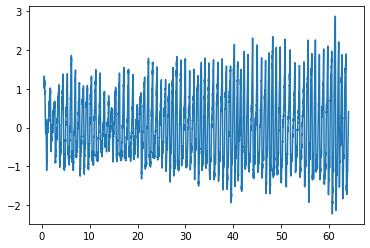

In [11]:
# detrend the high_peak series

nir = pv[int(0.006*f_s):-1:int(1/T_s *0.01)]

#decompose series
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_series = seasonal_decompose(nir, model='additive',period=100)
#decompose_series.plot()
#remove trend and seasonal components
series_adjusted = nir - decompose_series.seasonal- decompose_series.trend
series_adjusted
plt.plot(timestamp_ds,series_adjusted)


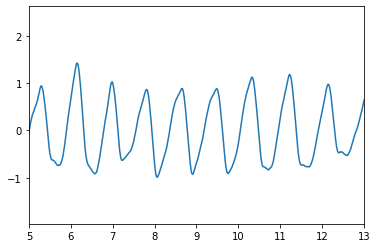

In [13]:
denoise = np.convolve(series_adjusted, np.ones(20)/20, mode = 'same')
plt.plot(timestamp_ds, denoise)
plt.xlim(5, 13)
plt.show()

In [19]:
from scipy.signal import find_peaks, peak_widths
import matplotlib.pyplot as plt

peaks, _ = find_peaks(timestamp_ds)
results_half = peak_widths(timestamp_ds, peaks, rel_height=0.5)
results_half[0]

array([], dtype=float64)